# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [88]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here

In [89]:
# Checking for missing values
missing_values = crops.isnull().sum()
missing_values

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [90]:
# Checking for crop types (unique values in 'crop' column)
unique_crops = crops['crop'].unique()
unique_crops

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [91]:
# Checking if data in each feature column is numeric
data_info = crops.dtypes
data_info

N         int64
P         int64
K         int64
ph      float64
crop     object
dtype: object

In [92]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = crops.drop('crop', axis=1)
y = crops['crop']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Looping over features and training a model for each
feature_performance = {}
for feature in X_train.columns:
    # Model for each feature
    log_reg = LogisticRegression(max_iter=2000, multi_class='multinomial')  # Adjust multi_class if needed
    log_reg.fit(X_train[[feature]], y_train)
    
    # Predicting and evaluating
    y_pred = log_reg.predict(X_test[[feature]])
    score = f1_score(y_test, y_pred, average='weighted')
    feature_performance[feature] = score

In [94]:
feature_performance

{'N': 0.10507916708090527,
 'P': 0.10457380486654515,
 'K': 0.2007873036107074,
 'ph': 0.04532731061152114}

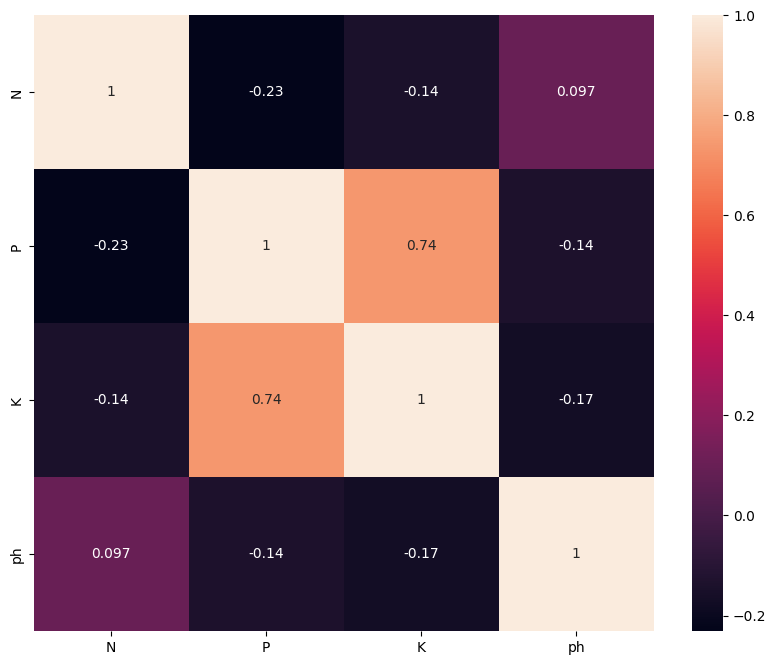

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating correlation
correlation_matrix = crops.corr()

# Visualizing correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [96]:
# Select features based on correlation analysis and individual feature performance
selected_features = ['N', 'P', 'K', 'ph']  # Replace with selected features

# Splitting the data with final features
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X[selected_features], y, test_size=0.20, random_state=42
)

# Train the final model
log_reg_final = LogisticRegression(max_iter=2000, multi_class='multinomial')
log_reg_final.fit(X_train_final, y_train_final)

# Evaluate the model
y_pred_final = log_reg_final.predict(X_test_final)
model_performance = f1_score(y_test_final, y_pred_final, average='weighted')


In [97]:
model_performance

0.6519082593270595

<Figure size 1200x600 with 0 Axes>

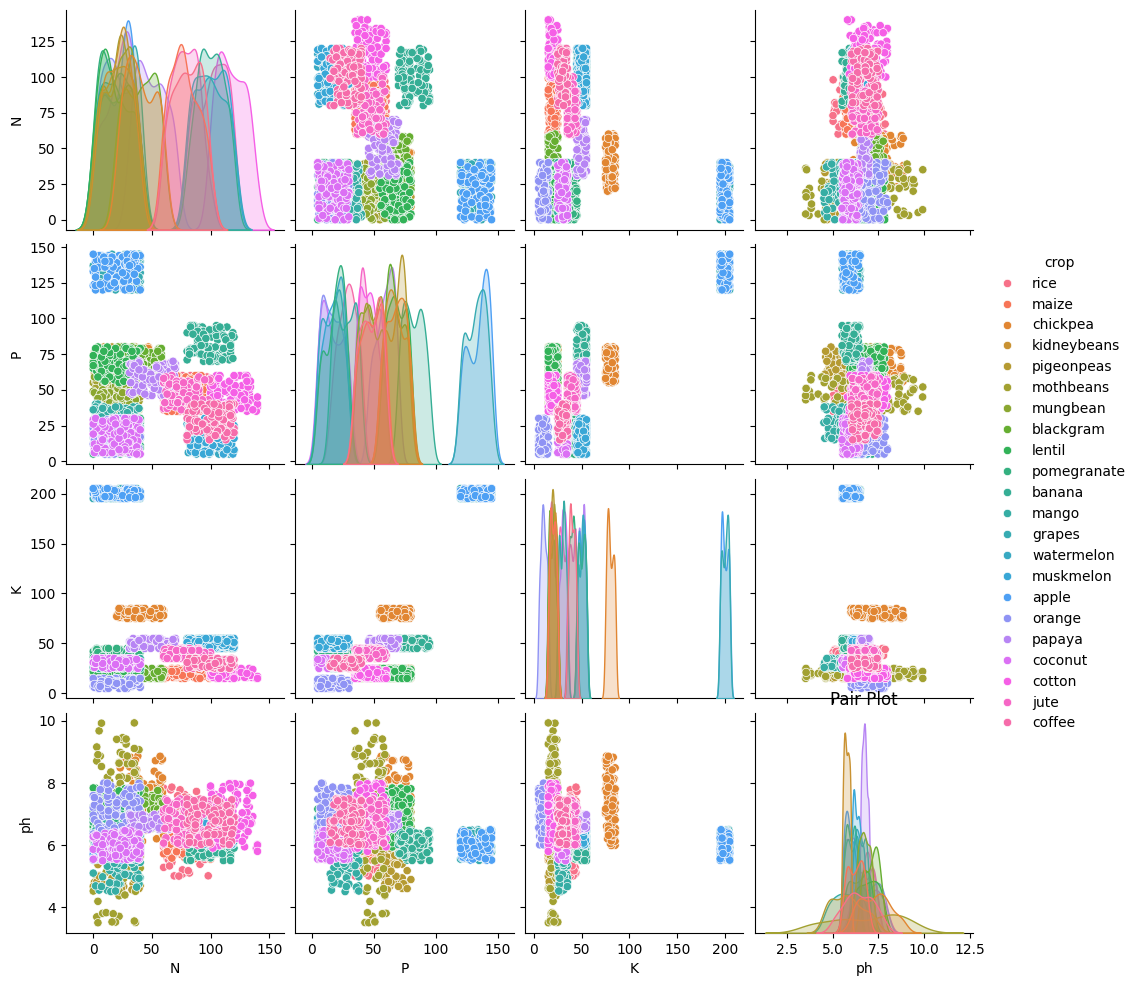

In [98]:
#Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.pairplot(crops, hue='crop')
plt.title('Pair Plot')
plt.show()